1 Problem definition

Dectect fruadulent credit card transactions (0 = legitimate, 1 = fraudulent) using a 30 feature dataset.
PCA is used to reduce the dimensionality of the dataset for efficiency and visualization, minimizing the financial risk and computational cost.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
data = pd.read_csv('creditcard.csv')

In [3]:
print('Data shape:', data.shape)

Data shape: (284807, 31)


In [4]:
print('Columns:', data.columns.tolist())

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [5]:
# Basic data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Difination of variables**
- 'Time': Number of seconds elapsed between this transaction and the first transaction in the dataset.
- 'V1' to 'V28': PCA transformed features.
- 'Amount': Transaction amount.
- 'Class': Target variable, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.

In [6]:
# Frist 5 rows of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print('Missing values:\n', data.isna().sum())

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [8]:
print('Duplicates:\n', data.duplicated().sum())
print('Percentage of duplicates:', data.duplicated().mean()* 100, '%')

Duplicates:
 1081
Percentage of duplicates: 0.379555277784605 %


2 Data Understanding and Exploration

In [9]:
# Summary statistics of the dataset
print('Summary statistics:\n', data.describe())

Summary statistics:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.175161e-15  3.384974e-16 -1.379537e-15  2.094852e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.021879e-15  1.494498e-15 -5.620335e-16  1.149614e-16 -2.414189e-15   
std    1.380247e+00  

Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
Percentage of fraudulent transactions: Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


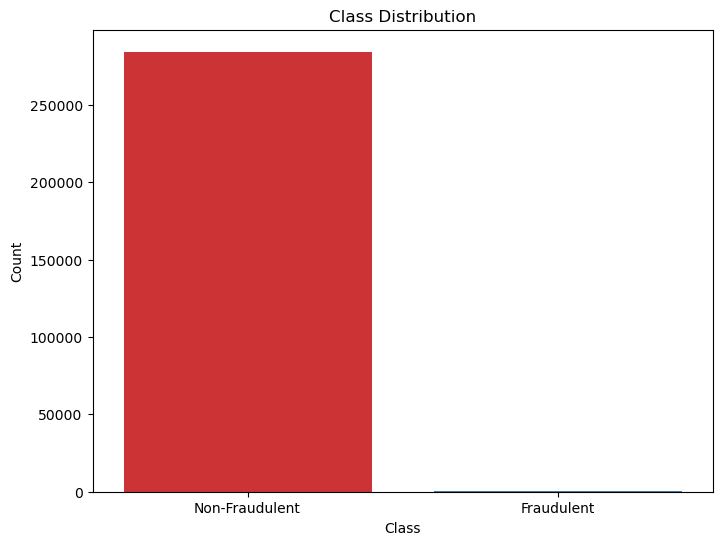

In [10]:
# Class distribution
print('Class distribution:\n', data['Class'].value_counts())
print('Percentage of fraudulent transactions:', data['Class'].value_counts(normalize = True) * 100)
# Plot class distribution
plt.figure(figsize = (8, 6))
sns.countplot(x= 'Class', data = data, palette = 'Set1')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

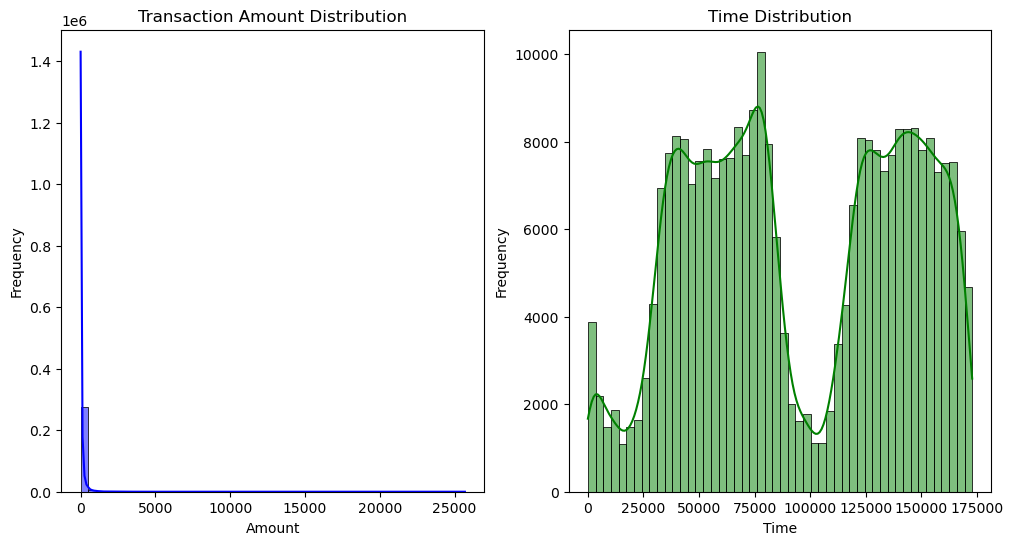

In [11]:
# Amount and Time distribution
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Amount'], bins = 50, kde =True, color = 'blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(data['Time'], bins = 50, kde = True, color = 'green')
plt.title('Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


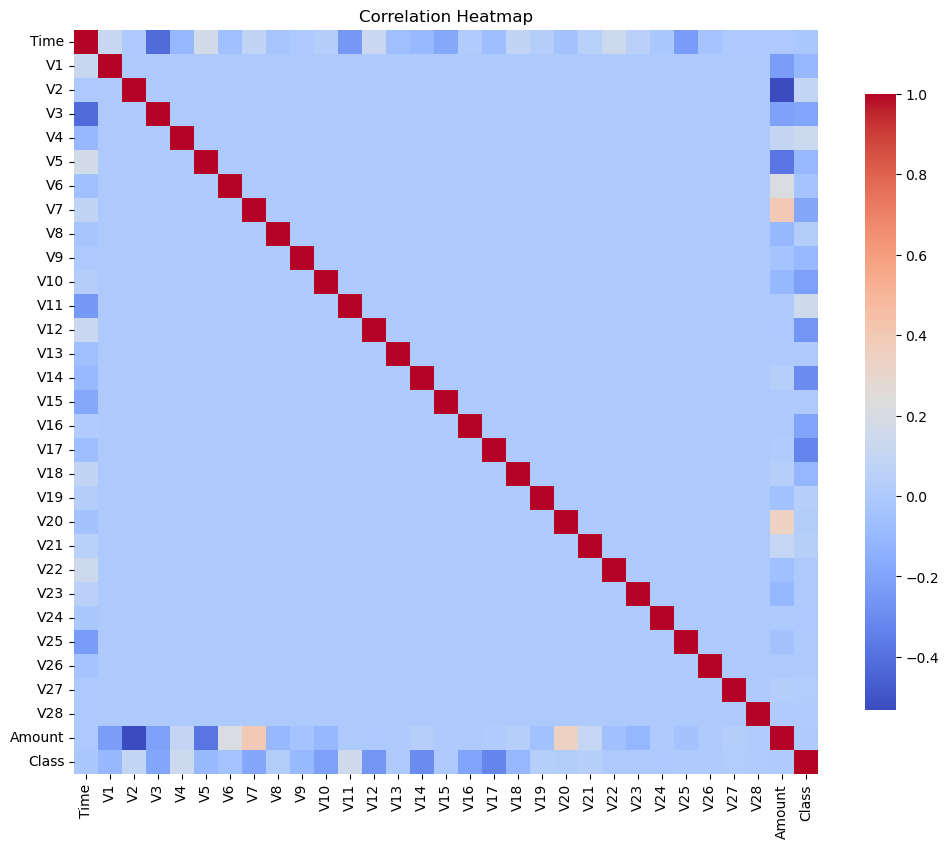

In [12]:
# Correlation heatmap
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), cmap = 'coolwarm', square = True, cbar_kws = {'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

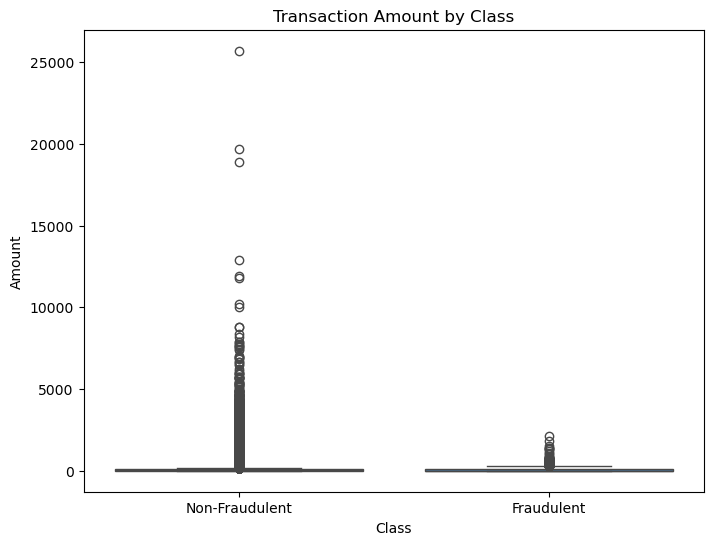

In [13]:
# Amount by Class
plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Class', y = 'Amount', data = data, palette = 'Set1')
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

- 284,807 transactions, 30 features, no missing values, and about 0.4% duplicates.
- 492 fraudulent transactions about 0.17% of the dataset, it is highly imbalanced.
- Amount variable has a long tail distribution, with most transactions being small amounts. 
- Time variable has cyclical patterns
- Low correlation due to prior PCA
- PCA transformed features (V1 to V28) are not highly correlated with each other

3. Data Preprocessing and Feature Engineering

In [14]:
# Remoce dupicates
data1 = data.drop_duplicates()
print('Data shape after removing duplicates:', data1.shape)

Data shape after removing duplicates: (283726, 31)


In [15]:
# Separate features and target variable
X = data1.drop(['Class'], axis = 1)
y = data1['Class']

In [16]:
# Standardize Amount and Time
scaler = StandardScaler()
X[['Amount', 'Time']] = scaler.fit_transform(X[['Amount', 'Time']])

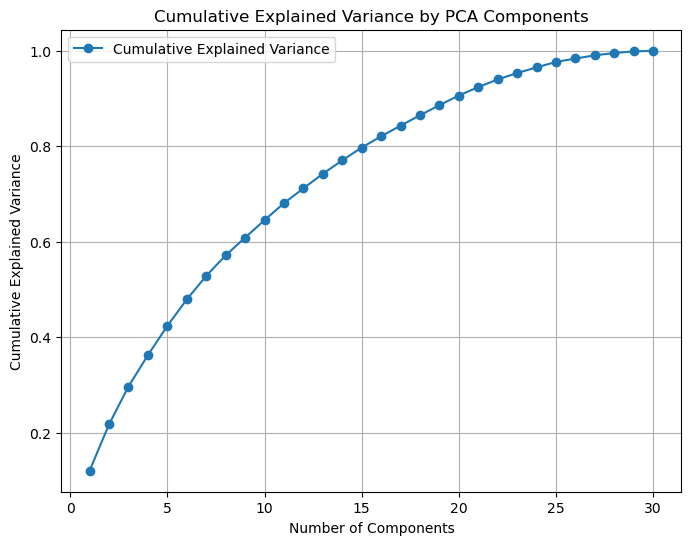

In [ ]:
# Visualize explained variance
pca0 = PCA()
pca0.fit(X)
cumulative_variance = np.cumsum(pca0.explained_variance_ratio_)
plt.figure(figsize = (8, 6))
plt.plot(np.arange(1, len(cumulative_variance) + 1), 
         cumulative_variance, 
         marker = 'o',
         label = 'Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
ticks = np.arange(0, X.shape[1] + 1, 5)
plt.xticks(ticks, ticks)
plt.grid()
plt.legend()
plt.show()


In [40]:
# Apply PCA and retain 90% of variance
pca = PCA(n_components = 0.90)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.60084822,  0.78455762,  3.06893657, ...,  0.10467172,
        -0.13160415,  0.46987108],
       [ 1.0781264 ,  0.27836341,  1.13322644, ..., -0.1248643 ,
         0.19145906, -0.13541821],
       [-2.12943267, -0.96043943,  2.75018778, ...,  0.60563335,
         0.58343836, -1.81457401],
       ...,
       [ 1.99636202, -1.32102925, -3.45380304, ...,  0.5408257 ,
        -0.08361638, -0.5460311 ],
       [ 0.05711798,  0.60077017, -0.05983625, ...,  0.56827747,
        -2.03532046,  2.44767755],
       [-0.58204017, -0.36928121, -0.33084121, ..., -0.14826869,
         0.3560929 , -0.08618533]], shape=(283726, 20))

In [19]:
# PCA results
print('Original number of features:', X.shape[1])
print('\nNumber of features after PCA:', X_pca.shape[1])
print('\nNumber of components explaining 90% variance:', pca.n_components_)
print('\nExplained variance ratio:', pca.explained_variance_ratio_)
print('\nTotal variance captured by PCA:', np.sum(pca.explained_variance_ratio_))


Original number of features: 30

Number of features after PCA: 20

Number of components explaining 90% variance: 20

Explained variance ratio: [0.12089588 0.09688699 0.07931212 0.06569646 0.06130103 0.05521101
 0.04940198 0.04291772 0.03719815 0.03652126 0.03553805 0.03097003
 0.03050173 0.0281497  0.02678888 0.0235368  0.02232156 0.02168139
 0.02124432 0.02018249]

Total variance captured by PCA: 0.9062575705124092


In [38]:
# Contribution of each component and importance of features
pca_components = pd.DataFrame(pca.components_.T, 
                              columns = [f'PC{i + 1}' for i in range(pca.n_components_)],
                              index = X.columns) # Original feature names
# Display PCA components
pca_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
Time,0.081132,-0.084384,-0.394320,0.137560,0.003892,-0.008608,0.113637,-0.046504,-0.154998,-0.363726,-0.145530,0.073437,0.003511,-0.091320,-0.166812,0.025159,-0.159118,-0.000130,-0.082684,-0.008747
V1,0.948973,-0.265211,0.084705,-0.073332,-0.015380,0.018328,0.032463,0.003697,0.014189,0.039700,0.005738,-0.008018,0.000320,0.013738,0.012255,-0.001503,0.015448,0.025579,0.036331,0.015274
V2,0.180453,0.809534,-0.236610,-0.390233,-0.075808,0.051182,0.109841,-0.018320,0.004345,0.022117,-0.024767,-0.007335,-0.001613,0.011060,-0.004810,-0.006538,0.007667,0.066844,0.097649,0.047198
V3,0.000543,0.228838,0.856126,0.124530,-0.062124,0.047446,0.211788,-0.032078,-0.089340,-0.204964,-0.078870,0.036798,0.004081,-0.029596,-0.073339,0.011613,-0.055743,0.039081,0.008267,0.017618
V4,-0.020209,-0.041045,0.107270,-0.398521,0.898275,-0.048730,-0.034824,-0.011600,-0.032147,-0.069575,-0.024177,0.010508,-0.001273,-0.021020,-0.022063,0.001104,-0.022932,-0.021362,-0.031052,-0.011407
V5,0.061830,0.165634,-0.146859,0.692664,0.407888,0.359153,0.244900,0.003436,0.057930,0.148458,0.031083,-0.025198,0.000102,0.040789,0.037761,-0.007425,0.044211,0.075823,0.111066,0.047327
V6,-0.033272,-0.080706,0.032583,-0.235704,-0.093463,0.923095,-0.205239,-0.009794,-0.028581,-0.077024,0.002773,0.015415,0.000758,-0.018825,-0.012909,0.004234,-0.017325,-0.041709,-0.065292,-0.028348
V7,-0.050694,-0.119973,-0.065915,-0.208693,-0.059990,0.082037,0.874239,0.191466,0.029545,0.012851,0.138081,0.006935,0.005808,0.002894,0.034225,0.009277,0.013949,-0.082578,-0.125878,-0.062057
V8,0.009160,0.033449,0.013984,0.032547,0.016040,-0.006027,-0.154954,0.977210,-0.041678,-0.064668,-0.054710,0.003976,0.007618,0.019896,-0.019246,0.006399,-0.000349,0.031747,0.023499,0.014533
V9,0.005113,0.009038,0.000711,0.009493,0.007510,-0.008516,-0.037225,0.008535,0.865880,-0.446552,0.215958,0.015211,0.002559,0.000050,0.000778,-0.001096,0.003616,0.020781,0.020428,0.010423


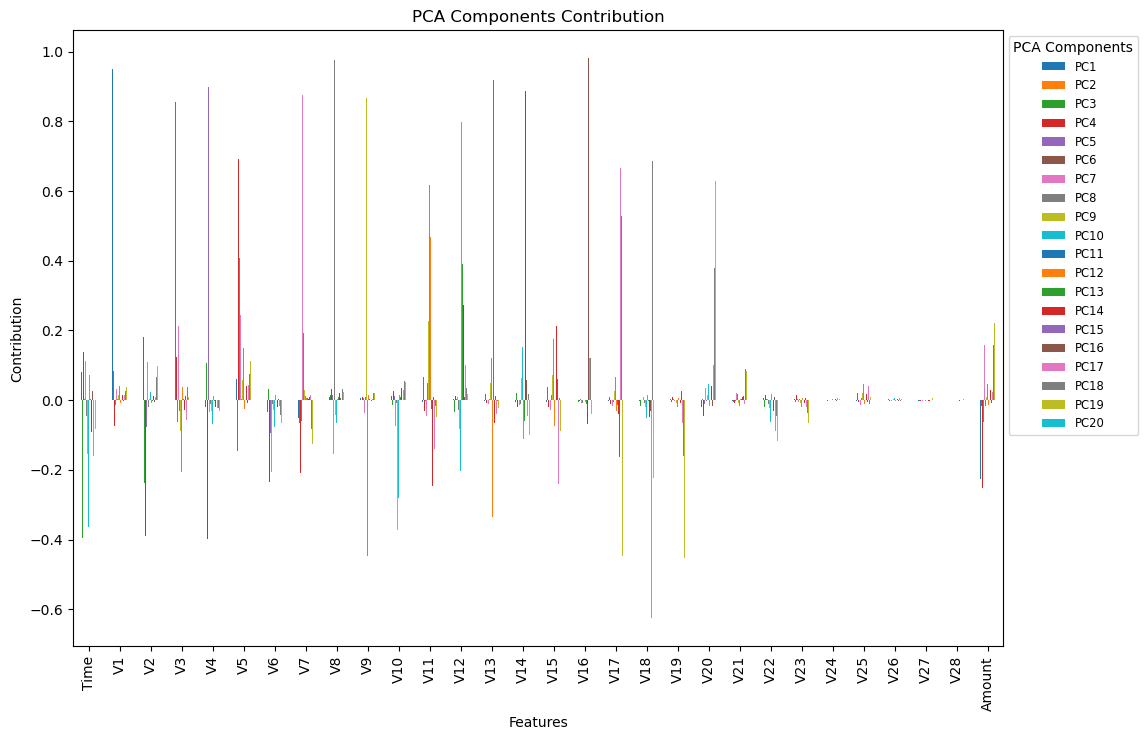

In [39]:
# Plot PCA components contributio
pca_components.plot(kind = 'bar', figsize = (12, 8))
plt.title('PCA Components Contribution')
plt.xlabel('Features')
plt.ylabel('Contribution')
plt.legend(title = 'PCA Components', 
           loc = 'upper left', 
           fontsize = 'small', 
           bbox_to_anchor=(1.0, 1.0))
plt.show()

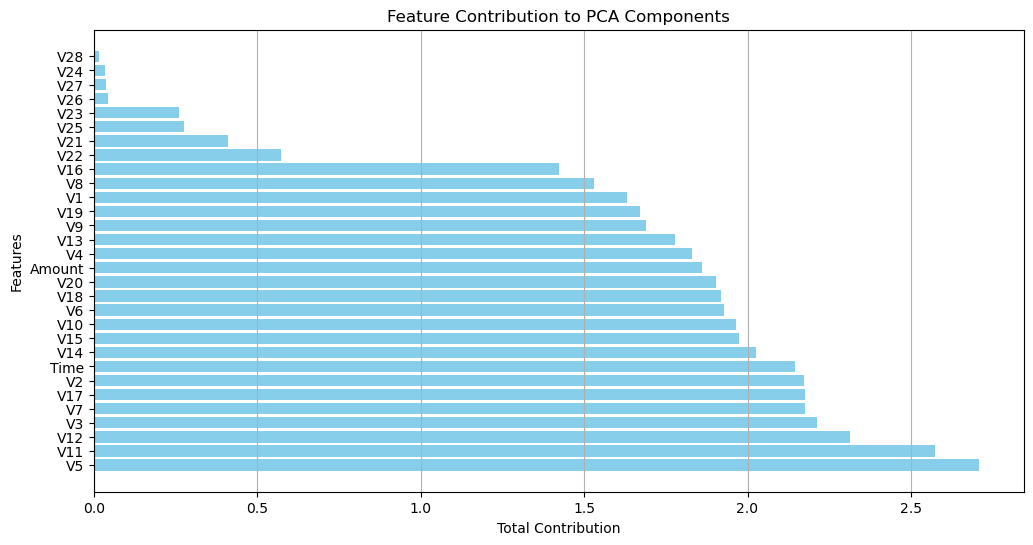

In [35]:
# Calculate total contribution of each feature
feature_contribution = pca_components.abs().sum(axis = 1).sort_values(ascending = False)
# Display feature contributions
plt.figure(figsize = (12, 6))
plt.barh(y = feature_contribution.index,
         width = feature_contribution.values, 
         color = 'skyblue'
         )
plt.title('Feature Contribution to PCA Components')
plt.xlabel('Total Contribution')
plt.ylabel('Features')
plt.grid(axis = 'x')
plt.show()


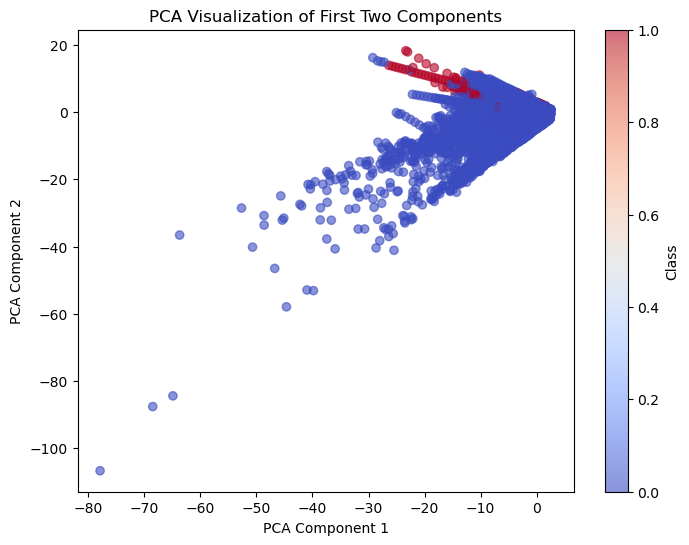

In [19]:
# Visualize PCA
plt.figure(figsize = (8, 6))
plt.scatter(x = X_pca[:, 0], y = X_pca[:, 1], c = y, cmap = 'coolwarm', alpha = 0.6)
plt.title('PCA Visualization of First Two Components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label = 'Class')
plt.show()

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 100, 
                                                    stratify = y)


In [21]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state = 100)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print('Shape of training features after SMOTE:', X_train_res.shape)
print('Shape of training target after SMOTE:', y_train_res.shape)

Shape of training features after SMOTE: (453204, 20)
Shape of training target after SMOTE: (453204,)


4. Model selection and traning

In [22]:
# Train Random Forest Classifier
model_rf = RandomForestClassifier(random_state = 100, n_jobs = -1)
# Train the model
model_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(n_jobs=-1, random_state=100)

In [23]:
# Predict on the test set
y_pred = model_rf.predict(X_test)
y_pred_proba = model_rf.predict_proba(X_test)[:, 1]

5. Model Evaluation and Optimization

In [24]:
# Evualation metrics
print('Classification Report:\n', classification_report(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_proba))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.80      0.82        95

    accuracy                           1.00     56746
   macro avg       0.92      0.90      0.91     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score: 0.9826654242179029


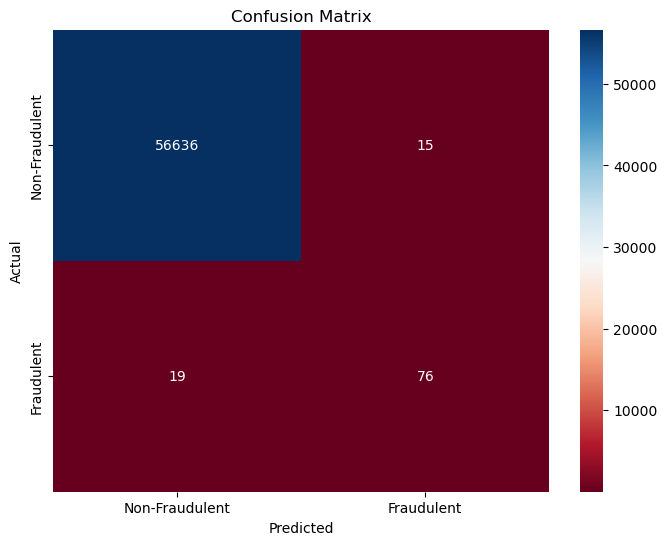

In [25]:
# Confusion matrix
plt.figure(figsize = (8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, 
            annot = True, 
            fmt = 'd', 
            cmap = 'RdBu', 
            xticklabels = ['Non-Fraudulent', 'Fraudulent'], 
            yticklabels = ['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

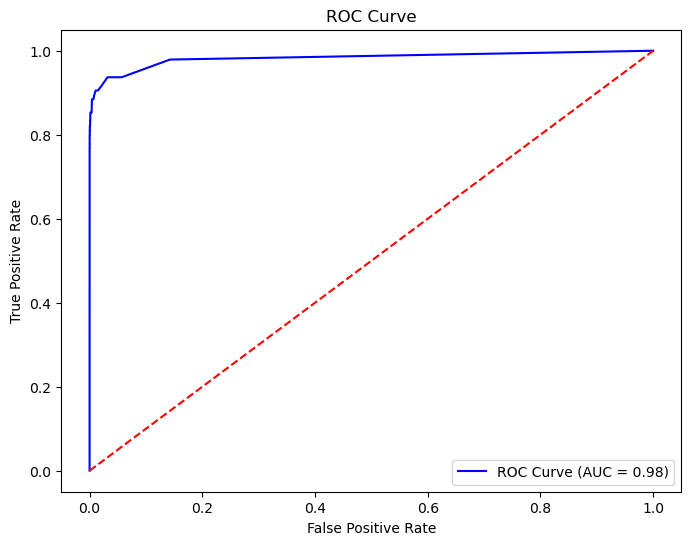

In [26]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', label = f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [66]:
# HalvingRandomSearchCV for hyperparameter tuning
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.ensemble import RandomForestClassifier
# Define the Random Forest model
model_rf = RandomForestClassifier(random_state = 100, n_jobs = -1)
# Define the parameter distribution for hyperparameter tuning
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Use a representative subset for faster evaluation
X_train_df = pd.DataFrame(X_train_res, columns = [f'PC{i + 1}'for i in range(X_train_res.shape[1])])
y_train_df = pd.Series(y_train_res, name = 'Class')
# Stratified sampling using train_test_split
from sklearn.model_selection import train_test_split
X_sample, _, y_sample, _ = train_test_split(
    X_train_df, y_train_df, 
    train_size=200000, 
    random_state=100, 
    stratify=y_train_df
)

# Because tuning hyperparameters can be computationally expensive, we use HalvingRandomSearchCV
# Check core cpu to ensure it is not too high core cpu to avoid overloading the system and to ensure the prcess runs smoothly
# Incase my system has 20 cores, I will use 10 cores for the tuning process
# import os check core cpu
import os
n_cores = os.cpu_count() // 2
halving_random_search = HalvingRandomSearchCV(estimator = model_rf,
                                                  param_distributions = param_dist,
                                                  scoring = 'roc_auc',
                                                  cv = 5,
                                                  n_jobs = n_cores,
                                                  verbose = 2,
                                                  random_state = 100,
                                                  factor = 2,
                                                  min_resources = 10000, # This is a more efficient option than 'exhaust', 
                                                  # 'smallest' is also a good option
                                                  # 'exhaust' is not recommended for large datasets
                                                  max_resources = 'auto',
                                                  aggressive_elimination = True)
# Fit the model
halving_random_search.fit(X_sample, y_sample)
# Best parameters and score
print('Best parameters:', halving_random_search.best_params_)
print('Best ROC AUC score:', halving_random_search.best_score_)
# Best estimator
best_halving_model = halving_random_search.best_estimator_

n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 10000
max_resources_: 200000
aggressive_elimination: True
factor: 2
----------
iter: 0
n_candidates: 20
n_resources: 10000
Fitting 5 folds for each of 20 candidates, totalling 100 fits
----------
iter: 1
n_candidates: 10
n_resources: 20000
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 2
n_candidates: 5
n_resources: 40000
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 3
n_candidates: 3
n_resources: 80000
Fitting 5 folds for each of 3 candidates, totalling 15 fits
----------
iter: 4
n_candidates: 2
n_resources: 160000
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best ROC AUC score: 0.9999731784806032


In case of large datasets, we can use tuning with HalvingRandomSearchCV instead of GridSearchCV and RandomizedSearchCV becuase it is more efficient and faster. 

In [60]:
# Predict on the test set using the best halving model
y_pred_halving = best_halving_model.predict(X_test)
y_pred_proba_halving = best_halving_model.predict_proba(X_test)[:, 1]

In [61]:
# Evaluation metrics for the best halving model
print('Classification Report for Halving Model:\n', classification_report(y_test, y_pred_halving))
print('ROC AUC Score for Halving Model:', roc_auc_score(y_test, y_pred_proba_halving))

Classification Report for Halving Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.79      0.81      0.80        95

    accuracy                           1.00     56746
   macro avg       0.89      0.91      0.90     56746
weighted avg       1.00      1.00      1.00     56746

ROC AUC Score for Halving Model: 0.9891750877254918


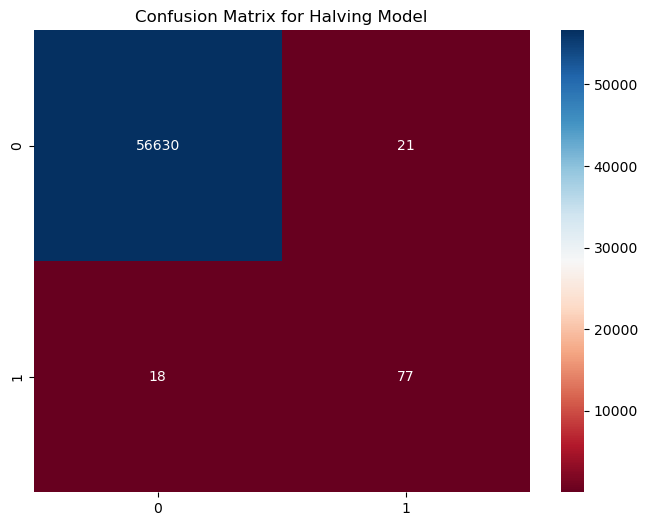

In [62]:
# Confusion matrix for the best halving model
plt.figure(figsize = (8, 6))
conf_matrix_halving = confusion_matrix(y_test, y_pred_halving)
sns.heatmap(conf_matrix_halving,
            annot = True,
            fmt = 'd',
            cmap = 'RdBu')
plt.xticklabels = ['Non-Fraudulent', 'Fraudulent'],
plt.yticklabels = ['Non-Fraudulent', 'Fraudulent'],
plt.xlabel = 'Predicted',
plt.ylabel = 'Actual'
plt.title('Confusion Matrix for Halving Model')
plt.show()

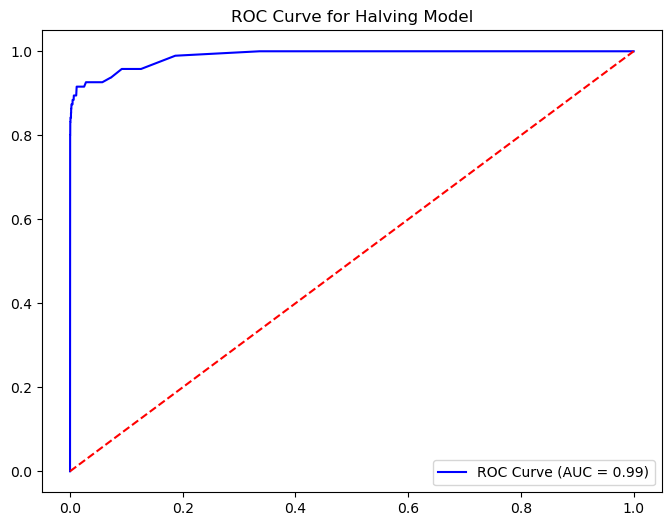

In [63]:
# ROC curve for the best halving model
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_halving)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'blue', label = f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba_halving):.2f})')
plt.plot([0, 1], [0, 1], color = 'red', linestyle = '--')
plt.title('ROC Curve for Halving Model')
plt.legend()
plt.show()

In [67]:
# Cross-validation for the best halving model
auc_scores = []
# Using cross_val_score to evaluate stability of the best halving model
for seed in [42, 52, 142]:
    x_sample, _, y_sample, _ = train_test_split(
        X_train_df, y_train_df, 
        train_size=200000, 
        random_state=seed, 
        stratify=y_train_df
    )
    cv_scores_halving = cross_val_score(best_halving_model, x_sample, y_sample, cv = 5, scoring = 'roc_auc', n_jobs = n_cores, verbose = 2)
    auc_scores.append(np.mean(cv_scores_halving))
print('Cross-validation ROC AUC scores for Halving Model:', auc_scores)
print('Mean ROC AUC score for Halving Model:', np.mean(auc_scores))
print('Standard deviation of ROC AUC scores for Halving Model:', np.std(auc_scores))

[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.5min finished
[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.


Cross-validation ROC AUC scores for Halving Model: [np.float64(0.999973049), np.float64(0.9999724195), np.float64(0.9999850104999999)]
Mean ROC AUC score for Halving Model: 0.9999768263333332
Standard deviation of ROC AUC scores for Halving Model: 5.792783187287545e-06


[Parallel(n_jobs=10)]: Done   5 out of   5 | elapsed:  1.5min finished


In [ ]:
# Conclusion
# PCA was applied to reduce dimensionality while retaining 90% of the variance.
# In case of large datasets, we can use tuning with HalvingRandomSearchCV instead of GridSearchCV and RandomizedSearchCV because it is more efficient and faster.
# ROC AUC score for the best halving model has been improved compred to the initial model.
# ROC AUC score indicates that the model is performing well in distingushing between fraudulent and non-fraudulent transactions.
# We use recall and precision to evaluate the model performance, especially in fraud detection where false negatives are more critical.
# We use precision to evaluate the model performance, especially in fraud detection where false positives are more critical.
# The f1-score is a good metric to evaluate the model performance in fraud detection, as it balances precision and recall.
# The model is performing well in detecting fraudulent transactions with a high recall and precision.